### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

## Assignment: COVID-19 data

## Context and Backgroud
The government wants to identify trends and patterns that can be used to inform its marketing approach to increase the number of fully vaccinated people.

The government would like to understand:
What the total vaccinations (first dose, second dose per region, total and overtime) are for a particular region.
Where they should target the first marketing campaign(s) based on:
area(s) with the largest number of people who have received a first dose but no second dose
which area has the greatest number of recoveries so that they can avoid this area in their initial campaign runs
whether deaths have been increasing across all regions over time or if a peak has been reached.
What other types of Twitter data points and tweets have both #coronavirus and #vaccinated hashtags.
Which regions have experienced a peak in hospitalisation numbers and if there are regions that have not reached a peak yet. Demonstrate if the provided functions can assist you to answer these questions. Provide reasons for your answer.

**SPECIAL NOTE**
- Submit your Jupyter Notebook with the following naming convention: `LSE_DA201_assignment_[your name]_[your surname]` (remove the square brackets).
- You should submit a zipped folder containing all the elements used in your Notebook (data files, images, etc.).

## 0) Environment preparation
These settings are provided for you. You do not need to make any changes.

In [3]:
# Import the required libraries and set the plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(15,10)})

### Report submission:
Please see link to Github repository below as well a screenshot of landing page
- [My Github Repo](https://github.com/danthorneloe/LSE_DA_COVID_analysis)

My Github screenshot
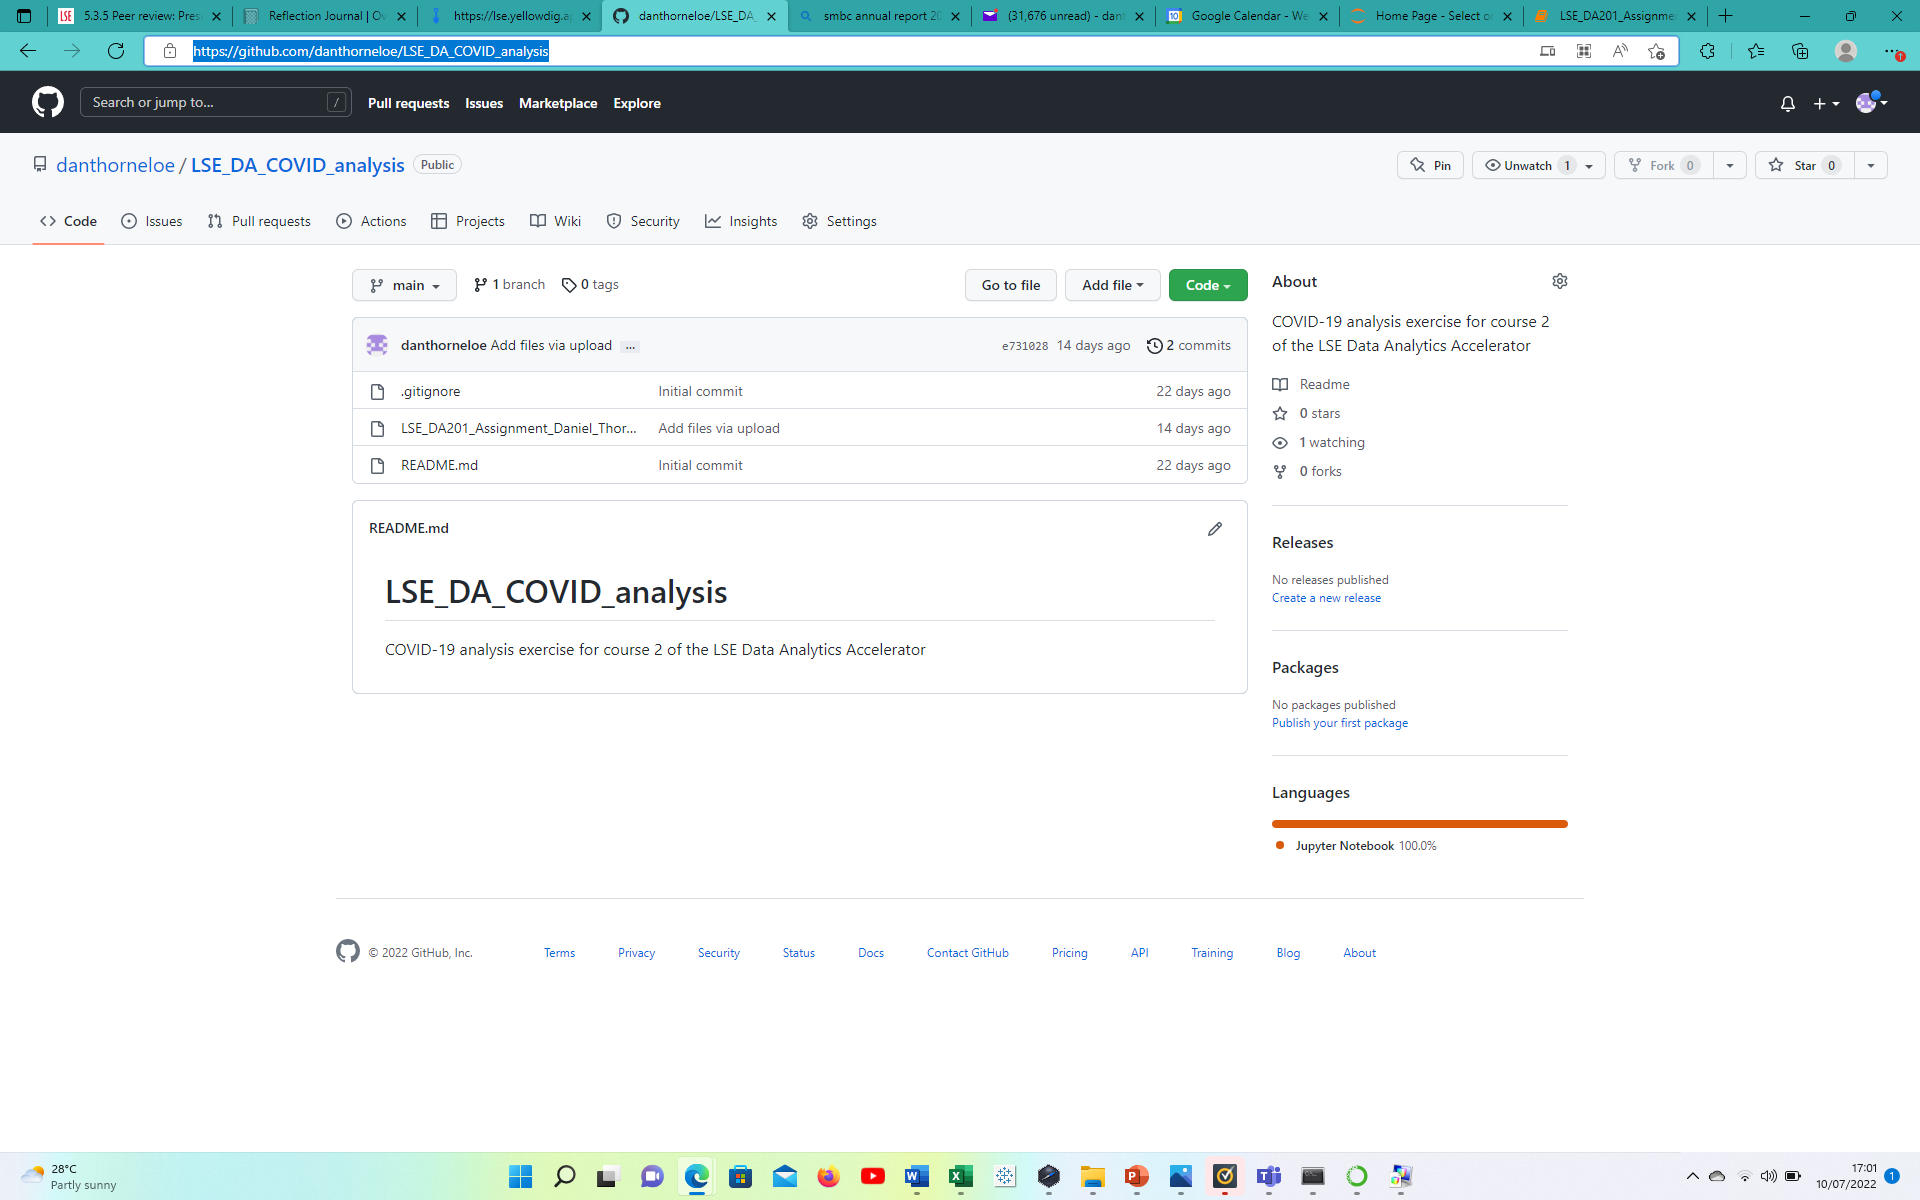

### 1.2) Presentation expectations:
Workflow tools such as GitHub can add value to organisations in a numebr of ways:
- Encourage collaboration and efficient team working by providing a simple yet powerful tool to  managing coding projects across multiple individuals. Central to this is… 
- Version control. By allowing users to take copies (branches) of the core code programmes can work on elements in parallel and then merge updated code with the core code by ‘committing’ changes a process that allows for oversight and provides some error checking. 
- Reverse changes. Mistakes can easily be reversed as previous versions of the code are stored
- Sharing best practice. GitHub is a vast repository of public code that can repurposed by other developers.
- Supporting a community. The community is a key source of knowledge and support for programmers to develop so providing better support to their organisations. 


### Optional for notebook/Required for presentation.
- You can use this cell as placeholder for bullet points to include in your presentation. 
- This section will not be graded in the Notebook, grades awarded based on presentation content only. 

(Double-click to edit)

## 2) Assignment activity 2: 

### 2.1) Report expectations:
- Load the files `covid_19_uk_cases.csv` and `covid_19_uk_vaccinated.csv` and explore the data.
- Explore the data using the `info()`, `describe()`, `shape` and `value_counts()` methods, and note the observations regarding data types, number or records and features.
- Identify missing data.
- Filter/subset data.
- Aggregate data (totals and by month).
- Note observations.

In [2]:
# Load the COVID-19 cases and vaccine data sets as cov and vac respectively

In [39]:
cov = pd.read_csv('covid_19_UK_cases.csv')
vac = pd.read_csv('covid_19_UK_vaccinated.csv')

In [5]:
#Explore the DataFrames with the appropriate functions
#View the DataFrame
cov

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-10,137735.0,8154306.0,0.0,378.0
7580,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-11,137763.0,8193769.0,0.0,386.0
7581,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-12,137944.0,8231437.0,0.0,386.0
7582,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-13,138080.0,8272883.0,0.0,0.0


In [4]:
#View the DataFrame
vac

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-10,1070,1216,1070
7580,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-11,1300,1604,1300
7581,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-12,1482,2027,1482
7582,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-13,0,0,0


In [7]:
# Output key information of the cov DataFrame
# info() function included shape and dtype info
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Deaths                    7582 non-null   float64
 9   Cases                     7582 non-null   float64
 10  Recovered                 7582 non-null   float64
 11  Hospitalised              7582 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 711.1+ KB


# Observations
- 2 null values present in data set in columns 8 to 11. Note addressed in later sections. 

In [8]:
# Output key information of the cov DataFrame
vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Vaccinated                7584 non-null   int64  
 9   First Dose                7584 non-null   int64  
 10  Second Dose               7584 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 651.9+ KB


In [9]:
# Column names of 'cov' data sets
# cov_headers = cov.columns.values.tolist()
# cov_headers
# Not run as provided by info() function


In [12]:
#view basix stats for data frame
cov.describe()

,Lat,Long,Intermediate Region Code,Deaths,Cases,Recovered,Hospitalised
count,7584.000000,7584.000000,7584.000000,7582.000000,7.582000e+03,7582.000000,7582.000000
mean,21.840267,-41.440047,12.500000,6210.202321,2.147082e+05,454.691242,685.228568
std,28.305518,30.527529,14.009849,24860.790148,1.007557e+06,1010.642337,819.256635
min,-51.796300,-81.254600,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,17.851075,-64.667625,0.000000,0.000000,1.200000e+01,0.000000,105.000000
50%,20.503650,-60.855483,2.500000,1.000000,1.685000e+02,13.000000,390.000000
75%,39.448675,-5.152225,29.000000,25.000000,1.585000e+03,312.000000,955.750000
max,55.378100,-2.364400,29.000000,138237.000000,8.317439e+06,8322.000000,4907.000000


In [40]:
#view basix stats for data frame
vac.describe()

,Lat,Long,Intermediate Region Code,Vaccinated,First Dose,Second Dose
count,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000
mean,21.840267,-41.440047,12.500000,5913.547600,6192.822257,5913.547600
std,28.305518,30.527529,14.009849,10846.410258,11439.883647,10846.410258
min,-51.796300,-81.254600,0.000000,0.000000,0.000000,0.000000
25%,17.851075,-64.667625,0.000000,0.000000,0.000000,0.000000
50%,20.503650,-60.855483,2.500000,0.000000,0.000000,0.000000
75%,39.448675,-5.152225,29.000000,8338.000000,7505.500000,8338.000000
max,55.378100,-2.364400,29.000000,69619.000000,94038.000000,69619.000000


# Observations 
- Potential outliers for max deaths in cov as 138k deaths is outside IQR. Recovered and hospitalised seem to be well below deaths, further investigation required. Vaccinated means received both doses. 

In [19]:
# check no missing values in province column
cov['Province/State'].isnull().sum()

0

In [18]:
#number of unique countries in data set
print(len(cov['Province/State'].unique()))
print(cov['Province/State'].unique())

12
['Anguilla' 'Bermuda' 'British Virgin Islands' 'Cayman Islands'
 'Channel Islands' 'Falkland Islands (Malvinas)' 'Gibraltar' 'Isle of Man'
 'Montserrat' 'Saint Helena, Ascension and Tristan da Cunha'
 'Turks and Caicos Islands' 'Others']


In [21]:
# Check for missing values in cov
cov_na = cov[cov.isna().any(axis=1)]

cov_na.shape

(2, 12)

In [22]:
# Check for missing values in vvac
vac_na = vac[vac.isna().any(axis=1)]

vac_na.shape

(0, 11)

In [23]:
#Show lines with missing data 
cov_na

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
875,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-21,NaN,NaN,NaN,NaN
876,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-22,NaN,NaN,NaN,NaN


In [26]:
#filter bermuda data only

bermuda_df= cov[cov['Province/State'] == 'Bermuda']

bermuda_df

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
632,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-01-22,0.0,0.0,0.0,0.0
633,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-01-23,0.0,0.0,0.0,0.0
634,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-01-24,0.0,0.0,0.0,0.0
635,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-01-25,0.0,0.0,0.0,0.0
636,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1259,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2021-10-10,89.0,5501.0,0.0,412.0
1260,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2021-10-11,89.0,5501.0,0.0,421.0
1261,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2021-10-12,92.0,5536.0,0.0,421.0
1262,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2021-10-13,92.0,5536.0,0.0,0.0


In [29]:
# get the row of max deaths
cov.loc[cov['Deaths'].idxmax()]

Province/State                       Others
Country/Region               United Kingdom
Lat                                 55.3781
Long                                 -3.436
ISO 3166-1 Alpha 3-Codes                GBR
Sub-region Name             Northern Europe
Intermediate Region Code                  0
Date                             2021-10-14
Deaths                             138237.0
Cases                             8317439.0
Recovered                               0.0
Hospitalised                            0.0
Name: 7583, dtype: object

In [34]:
uk_df= cov[cov['Province/State'] == 'Others']
pd.set_option("display.max_rows", None)
uk_df

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
6952,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-22,0.0,0.0,0.0,0.0
6953,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-23,0.0,0.0,0.0,0.0
6954,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-24,0.0,0.0,0.0,0.0
6955,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-25,0.0,0.0,0.0,0.0
6956,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-26,0.0,0.0,0.0,0.0
6957,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-27,0.0,0.0,0.0,0.0
6958,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-28,0.0,0.0,0.0,0.0
6959,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-29,0.0,0.0,0.0,0.0
6960,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-30,0.0,0.0,0.0,0.0
6961,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-31,0.0,2.0,0.0,0.0


In [31]:
uk_df.describe()

,Lat,Long,Intermediate Region Code,Deaths,Cases,Recovered,Hospitalised
count,6.320000e+02,6.320000e+02,632.0,632.000000,6.320000e+02,632.000000,632.000000
mean,5.537810e+01,-3.436000e+00,0.0,74346.748418,2.565903e+06,6.511076,452.164557
std,8.675488e-13,2.222205e-14,0.0,48504.888849,2.481153e+06,32.602245,504.094517
min,5.537810e+01,-3.436000e+00,0.0,0.000000,0.000000e+00,0.000000,0.000000
25%,5.537810e+01,-3.436000e+00,0.0,40312.250000,2.826042e+05,0.000000,69.750000
50%,5.537810e+01,-3.436000e+00,0.0,59906.000000,1.666695e+06,0.000000,297.500000
75%,5.537810e+01,-3.436000e+00,0.0,127606.000000,4.435449e+06,0.000000,681.000000
max,5.537810e+01,-3.436000e+00,0.0,138237.000000,8.317439e+06,344.000000,2159.000000


# Observations
- Assumption; Province/State of 'Others' = GBR given volumes and alpha code of GBR
- 'Recovered' and 'Hospitalised' data seems very patchy so this likely a daily count not running total unlike deaths and cases. Data dictionary not clear. 
- Recovered data for GBR seems very poor so use with caution

In [37]:
#Investigate difference between first ans second doses for vac data 
#View vac data
vac.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0,0,0


In [56]:
# sum vacination by province 
#vac_sum =vac.groupby('Province/State')['Vaccinated', 'First Dose', 'Second Dose'].sum()
#vac_sum

#add new column to to show difference in first dose vs second dose
# does not work as need to groupby as well 
#vac_sum["Delta First/Second Dose"] = ((vac_sum["First Dose"] / vac_sum["Second Dose"]) * 100)
#vac_sum

#vac_sum["Delta First/Second Dose"] = vav.groupby('Province/State')

# Calculating percentage of region's sales
#vac_sum['Delta First/Second Dose'] = vac_sum['First Dose'] / df.groupby('region')['sales'].transform('sum')
#print(df.head())

#find ration of doses for each Province/State in DataFrame
vac.groupby('Province/State').apply(lambda x: (x['Second Dose'] / x['First Dose']).sum())


Province/State
Anguilla                                        527.843137
Bermuda                                         527.852192
British Virgin Islands                          527.846322
Cayman Islands                                  527.853196
Channel Islands                                 527.844271
Falkland Islands (Malvinas)                     527.847920
Gibraltar                                       527.854055
Isle of Man                                     527.838177
Montserrat                                      527.850490
Others                                          527.857615
Saint Helena, Ascension and Tristan da Cunha    527.846091
Turks and Caicos Islands                        527.841623
dtype: float64

# Visualise Gibraltar data 

In [35]:
# Create DataFrame based on Gibraltar data
gibraltar_cov = cov[cov['Province/State'] == 'Gibraltar']
pd.set_option("display.max_rows", None)
gibraltar_cov

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0.0,0.0,0.0,0.0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0.0,0.0,0.0,0.0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0.0,0.0,0.0,0.0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0.0,0.0,0.0,0.0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0.0,0.0,0.0,0.0
3797,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-27,0.0,0.0,0.0,0.0
3798,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-28,0.0,0.0,0.0,0.0
3799,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-29,0.0,0.0,0.0,0.0
3800,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-30,0.0,0.0,0.0,0.0
3801,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-31,0.0,0.0,0.0,0.0


In [36]:
#subset data frame 
gibraltar_cov_subset = gibraltar_cov [['Date','Deaths', 'Cases', 'Recovered','Hospitalised']]

#Data already sorted by date but code below if needed
#gibraltar_subset.sort_values(by=['Date'], inplace=True, ascending=False)

gibraltar_cov_subset.head()

,Date,Deaths,Cases,Recovered,Hospitalised
3792,2020-01-22,0.0,0.0,0.0,0.0
3793,2020-01-23,0.0,0.0,0.0,0.0
3794,2020-01-24,0.0,0.0,0.0,0.0
3795,2020-01-25,0.0,0.0,0.0,0.0
3796,2020-01-26,0.0,0.0,0.0,0.0


In [43]:
gibraltar_cov_subset.describe()

,Deaths,Cases,Recovered,Hospitalised
count,632.000000,632.000000,632.000000,632.000000
mean,40.208861,2237.109177,1512.821203,1027.625000
std,45.332832,2136.268090,1817.096755,1145.681058
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,177.000000,109.500000,157.750000
50%,5.000000,1036.500000,323.500000,675.500000
75%,94.000000,4286.000000,4122.500000,1548.000000
max,97.000000,5727.000000,4670.000000,4907.000000


In [ ]:
# Explore behaviour over time

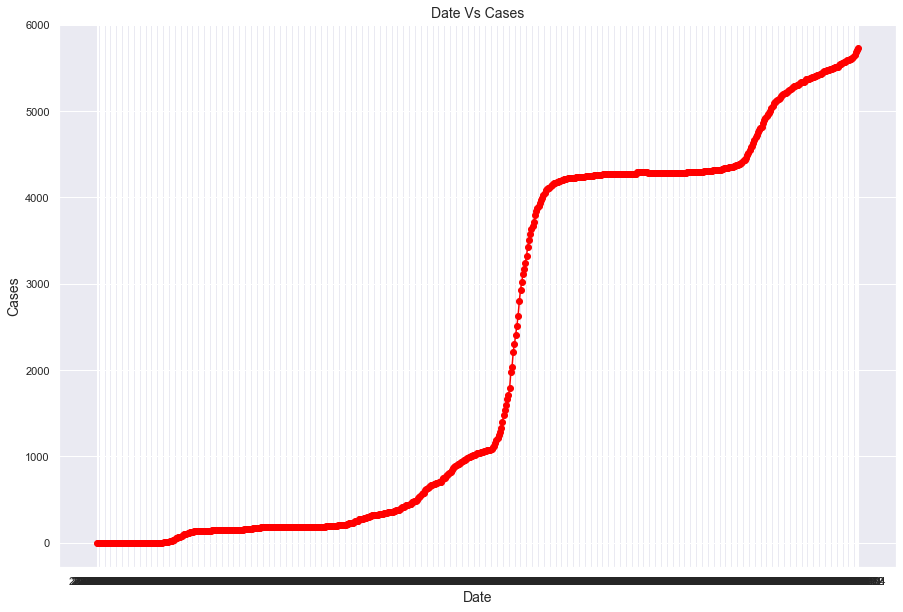

In [44]:
plt.plot(gibraltar_cov_subset['Date'], gibraltar_cov_subset['Cases'], color='red', marker='o')
plt.title('Date Vs Cases', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cases', fontsize=14)
plt.grid(True)
plt.show()

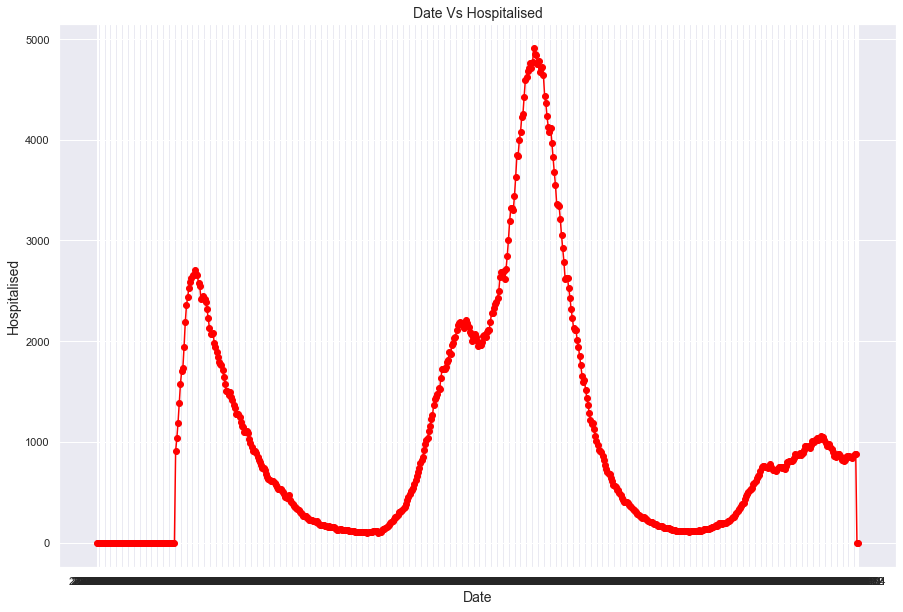

In [45]:
plt.plot(gibraltar_cov_subset['Date'], gibraltar_cov_subset['Hospitalised'], color='red', marker='o')
plt.title('Date Vs Hospitalised', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Hospitalised', fontsize=14)
plt.grid(True)
plt.show()

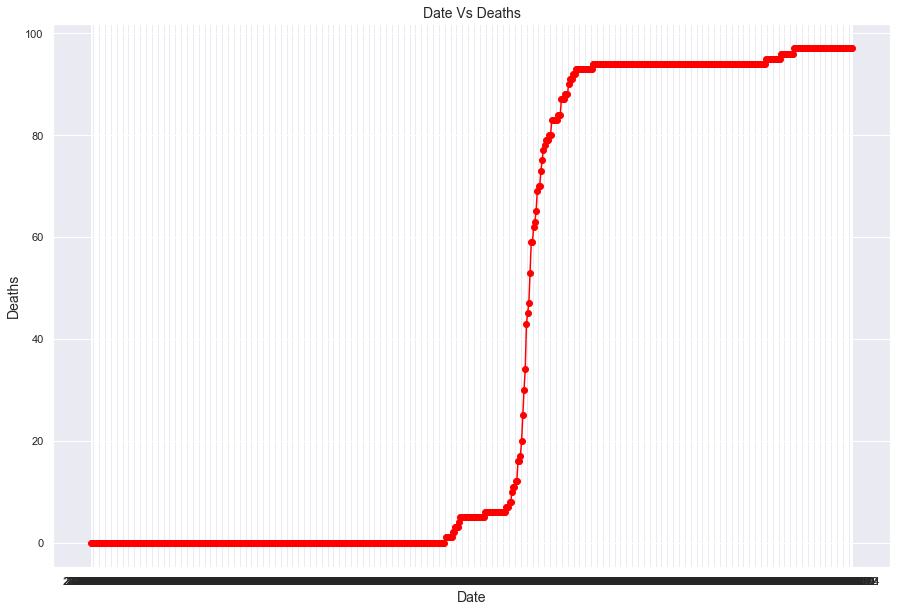

In [46]:
plt.plot(gibraltar_cov_subset['Date'], gibraltar_cov_subset['Deaths'], color='red', marker='o')
plt.title('Date Vs Deaths', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Deaths', fontsize=14)
plt.grid(True)
plt.show()

In [47]:
#create data frame for vaccination data
gibraltar_vac = vac[vac['Province/State'] == 'Gibraltar']
gibraltar_vac

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0,0,0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0,0,0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0,0,0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0,0,0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0,0,0
3797,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-27,0,0,0
3798,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-28,0,0,0
3799,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-29,0,0,0
3800,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-30,0,0,0
3801,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-31,0,0,0


In [49]:
#subset vaccination data frame 
gibraltar_vac_subset = gibraltar_vac [['Date','Vaccinated', 'First Dose', 'Second Dose']]
gibraltar_vac_subset

,Date,Vaccinated,First Dose,Second Dose
3792,2020-01-22,0,0,0
3793,2020-01-23,0,0,0
3794,2020-01-24,0,0,0
3795,2020-01-25,0,0,0
3796,2020-01-26,0,0,0
3797,2020-01-27,0,0,0
3798,2020-01-28,0,0,0
3799,2020-01-29,0,0,0
3800,2020-01-30,0,0,0
3801,2020-01-31,0,0,0


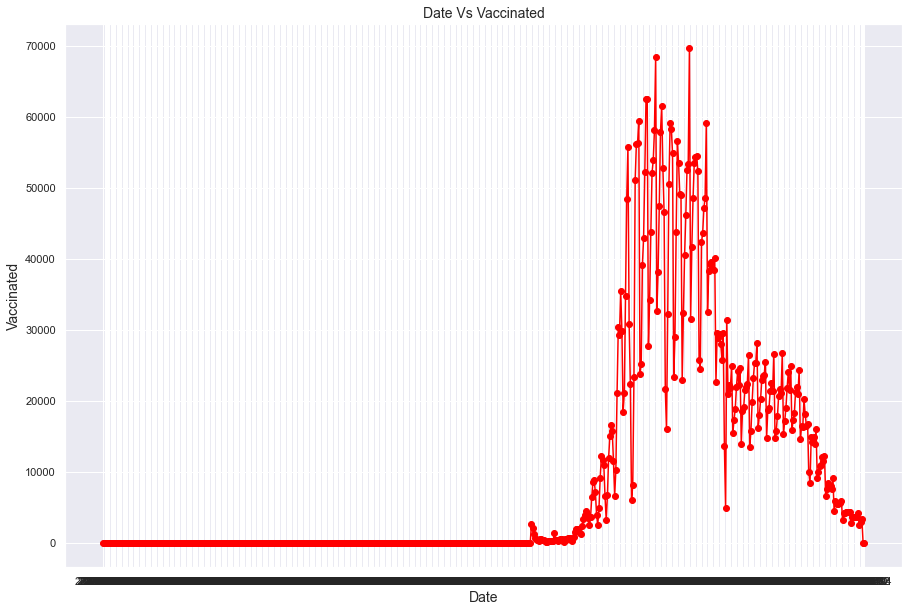

In [51]:
plt.plot(gibraltar_vac_subset['Date'], gibraltar_vac_subset['Vaccinated'], color='red', marker='o')
plt.title('Date Vs Vaccinated', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Vaccinated', fontsize=14)
plt.grid(True)
plt.show()

# Explore and note observations
#Did you notice anything interesting about the data?
Already in date order so didnt need to sort  - dates are dayly
Only two records with missing data - bermuda
Vaccinated data is absolute data where as deaths etc are cumulative?

#Does the DataFrame have a default index? 
Yes - a number

#What are some of the initial insights you've discovered?
High hospitalisations with relatively losw cases inititally
Cases spike as do hospitalisations



#How has the number of vaccinated individuals changed over time? What might these changes indicate? Include reasons to support your rationale.
#On which date(s) are there values missing, and from which columns and rows are these values missing? Which states or provinces do the missing values belong to?
#Is there anything unusual about the filtered Gilbraltar DataFrame? Include reasons to support your rationale.
# Are there any visualisations that could be added here to make it easier?
# Line chart as above to 

### 2.2) Presentation expectations:
Use the process of exploring the data for Gibraltar as an example to provide a brief description of the various phases to help your team to understand the process. Keep it high level and make sure to focus on both specifics relating to the case (first dose, second dose per region, total and over time) and brief observations regarding the process. Assignment activity 2 considers basic data exploration.
- Can we make decisions based on total numbers only, or do trends over time offer additional insights?
- Why it is important to explore the data, what are the typical mistakes made in this phase?

## 3) Assignment activity 3: 

### 3.1) Report expectations:
- Merge and explore the data.
- Convert the data type of the Date column from object to DateTime.
- Create a data set that meets the expected parameters.
- Add calculated features to DataFrames (difference between first and second dose vaccinations).
- Filter and sort output.
- Observe totals and percentages as a total and over time.
- Note observations.

Merge the DataFrames without duplicating columns. The new DataFrame (e.g. `covid`) will have `7584` rows and the following columns: `Province/State, Country/Region, Date, Vaccinated, First Dose, Second Dose, Deaths, Cases, Recovered, Hospitalised`.

In [ ]:
# Join the DataFrames as covid where you merge cov and vac

In [54]:
#show colums in both data frames to idneitify merge key
print(cov.columns)
print(vac.columns)


Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Date', 'Deaths', 'Cases', 'Recovered',
       'Hospitalised'],
      dtype='object')
Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Date', 'Vaccinated', 'First Dose',
       'Second Dose'],
      dtype='object')


In [58]:
#new vac data frame with required colums only i.e remove duplicate geopgraphic data
vac_reduced = vac.loc[:, 'Vaccinated' : 'Second Dose']
#print(vac_reduced)

      Vaccinated  First Dose  Second Dose
0              0           0            0
1              0           0            0
2              0           0            0
3              0           0            0
4              0           0            0
5              0           0            0
6              0           0            0
7              0           0            0
8              0           0            0
9              0           0            0
10             0           0            0
11             0           0            0
12             0           0            0
13             0           0            0
14             0           0            0
15             0           0            0
16             0           0            0
17             0           0            0
18             0           0            0
19             0           0            0
20             0           0            0
21             0           0            0
22             0           0      

In [59]:
# There is no column suitable as primary key Option 1) as data 
# is in order (region/date) use index or 2) constuct key using 3-code conactinatedf with date
# Merge the two DataFrames by index
cov_vac = pd.merge(cov, vac_reduced, left_index=True, right_index=True)
cov_vac.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0,0,0,0


In [ ]:
# Explore the new DataFrame

In [62]:
# view the shape of the data  - 3 more rows added by merge with vac
cov_vac.shape

(7584, 15)

In [63]:
# view data types - date is object not date format
cov_vac.dtypes

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object

In [64]:
# view basic stats of DataFrame
cov_vac.describe()

,Lat,Long,Intermediate Region Code,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
count,7584.000000,7584.000000,7584.000000,7582.000000,7.582000e+03,7582.000000,7582.000000,7584.000000,7584.000000,7584.000000
mean,21.840267,-41.440047,12.500000,6210.202321,2.147082e+05,454.691242,685.228568,5913.547600,6192.822257,5913.547600
std,28.305518,30.527529,14.009849,24860.790148,1.007557e+06,1010.642337,819.256635,10846.410258,11439.883647,10846.410258
min,-51.796300,-81.254600,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.851075,-64.667625,0.000000,0.000000,1.200000e+01,0.000000,105.000000,0.000000,0.000000,0.000000
50%,20.503650,-60.855483,2.500000,1.000000,1.685000e+02,13.000000,390.000000,0.000000,0.000000,0.000000
75%,39.448675,-5.152225,29.000000,25.000000,1.585000e+03,312.000000,955.750000,8338.000000,7505.500000,8338.000000
max,55.378100,-2.364400,29.000000,138237.000000,8.317439e+06,8322.000000,4907.000000,69619.000000,94038.000000,69619.000000


In [70]:
#identify if any null values in dataframe
nan_in_df = cov_vac.isnull().sum()
  
print(nan_in_df)

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      2
Cases                       2
Recovered                   2
Hospitalised                2
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64


In [ ]:
# Fix the date column data type

In [74]:
cov_vac['Date'] = cov_vac['Date'].astype(np.datetime64)
cov_vac.dtypes

Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Deaths                             float64
Cases                              float64
Recovered                          float64
Hospitalised                       float64
Vaccinated                           int64
First Dose                           int64
Second Dose                          int64
dtype: object

In [75]:
# Clean up / drop unnecessary columns
# Already done In[58]

In [81]:
# locate null values

cov_vac.loc[pd.isna(cov_vac["Deaths"]), :].index

Int64Index([875, 876], dtype='int64')

In [84]:
cov_vac.iloc[[875,876]]

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
875,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-21,NaN,NaN,NaN,NaN,0,0,0
876,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-22,NaN,NaN,NaN,NaN,0,0,0


In [88]:
# identify mean death, cases, recoved, hospitlaised for Bermuda 
cov_vac.groupby("Province/State")[["Deaths", "Cases", "Recovered", "Hospitalised"]].mean()

,Deaths,Cases,Recovered,Hospitalised
Province/State,,,,
Anguilla,0.037975,5.587816e+01,20.107595,863.196203
Bermuda,16.433333,1.088003e+03,577.776190,494.519048
British Virgin Islands,5.653481,4.508877e+02,101.833861,904.281646
Cayman Islands,1.441456,3.445506e+02,240.588608,616.564873
Channel Islands,58.750000,3.098066e+03,1625.990506,575.458861
Falkland Islands (Malvinas),0.000000,3.240823e+01,23.344937,657.674051
Gibraltar,40.208861,2.237109e+03,1512.821203,1027.625000
Isle of Man,23.814873,1.403691e+03,519.492089,739.881329
Montserrat,0.852848,1.512025e+01,10.088608,945.389241


In [91]:
# replace Bermuda NaN with means 
cov_vac['Deaths'][cov_vac['Deaths'].isna()] = 16.4
cov_vac['Cases'][cov_vac['Cases'].isna()] = 1.088003e+03
cov_vac['Recovered'][cov_vac['Recovered'].isna()] = 577.8
cov_vac['Hospitalised'][cov_vac['Hospitalised'].isna()] = 494.5
cov_vac.iloc[[875,876]] #check change took place

C:\Users\danth\AppData\Local\Temp/ipykernel_25236/3348457346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov_vac['Deaths'][cov_vac['Deaths'].isna()] = 16.4
C:\Users\danth\AppData\Local\Temp/ipykernel_25236/3348457346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov_vac['Cases'][cov_vac['Cases'].isna()] = 1.088003e+03
C:\Users\danth\AppData\Local\Temp/ipykernel_25236/3348457346.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
875,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-21,16.4,1088.003,577.8,494.5,0,0,0
876,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-22,16.4,1088.003,577.8,494.5,0,0,0


In [ ]:
# Groupby and calculate difference between first and second dose

In [96]:
#add new column to to show difference in first dose vs second dose
cov_vac["Delta First/Second Dose"] = cov_vac["First Dose"] - cov_vac["Second Dose"]
cov_vac.head()

# identify mean death, cases, recoved, hospitlaised for Bermuda 
#cov_vac.groupby("Province/State")[["First Dose", "Second Dose", ]].sum()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose,Delta First/Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0,0,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0,0,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0,0,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0,0,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0,0,0,0,0


In [97]:
# sum of doses by province
cov_vac.groupby("Province/State")[["First Dose", "Second Dose", "Delta First/Second Dose" ]].sum()
# Doubled checked that this is 

,First Dose,Second Dose,Delta First/Second Dose
Province/State,,,
Anguilla,4931470,4709072,222398
Bermuda,2817981,2690908,127073
British Virgin Islands,5166303,4933315,232988
Cayman Islands,3522476,3363624,158852
Channel Islands,3287646,3139385,148261
Falkland Islands (Malvinas),3757307,3587869,169438
Gibraltar,5870786,5606041,264745
Isle of Man,4226984,4036345,190639
Montserrat,5401128,5157560,243568


In [2]:
# Groupby and calculate the difference between first and second dose over time

Text(0.5, 1.0, 'First Dose counts by day in UK territories')

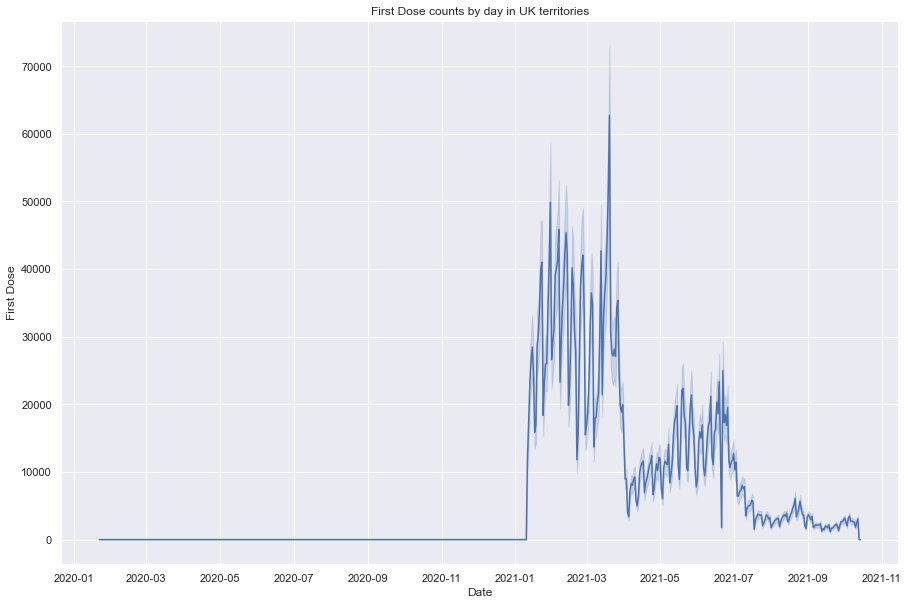

In [98]:
#Pivot or melt table to show countries along y axis and date column on x axis 
# How doses changes over time.
# Seaborn lineplots.
# Import required libs
import seaborn as sns
from matplotlib.dates import *

sns.lineplot(x='Date', y='First Dose',
            data=cov_vac).set_title("First Dose counts by day in UK territories")

Text(0.5, 1.0, 'Second Dose counts by day in UK territories')

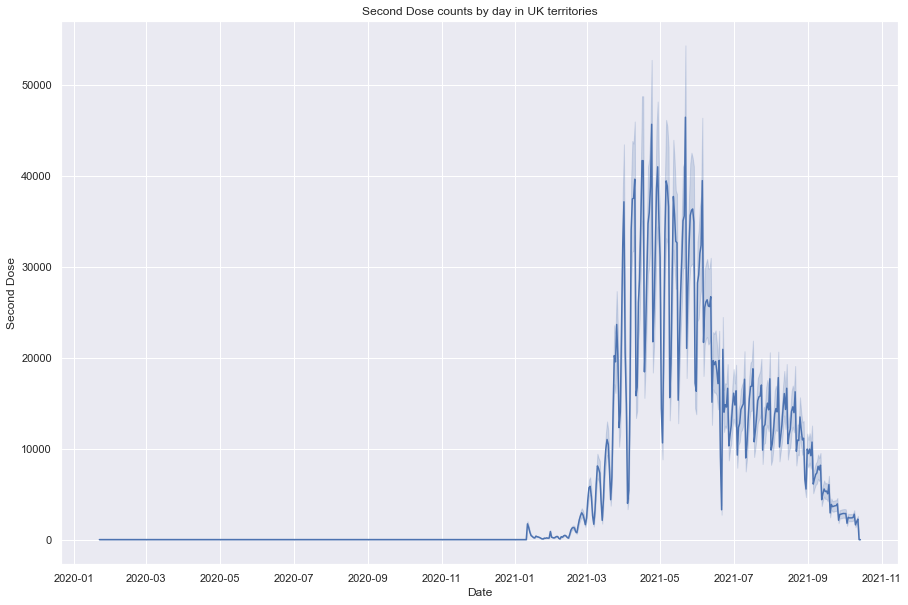

In [99]:
sns.lineplot(x='Date', y='Second Dose',
            data=cov_vac).set_title("Second Dose counts by day in UK territories")

### 3.2) Presentation expectations:
We use similar calculations and representations as we had in assignment activity 2, but now expand to look at all provinces. Assignment activity 3 is concerned with exploring data in the context of a specific business question (as opposed to general exploration in assignment activity 2).
- What insights can be gained from the data? (Description of all regions, assumptions and concerns, trends or patterns you have observed.)
- Are there limitations or assumptions that needs to be considered?
- Make sure to provide a brief overview of the data and typical considerations at this phase of analysis.

## 4) Assignment activity 4: 

The government is looking to promote second dose vaccinations and would like to know the best possible area to test a new campaign. They are looking for the highest number of people who have received a first dose and not a second dose. 
- Where should they target?
- Which provinces have the highest number (actual numbers) and highest relative numbers (second dose only/first dose)?
- Visualise both outputs.

### 4.1) Report expectations:
- Consider additional features (deaths and recoveries).
- Visualise the data.
- Note observations:
 - Do deaths follow the same patterns observed in vaccination data (daily vs cumulative)?
 - Do we need to separate groups of data for specific variables and analyse them in isolation (Others) to be able to observe the patterns?

### 4.2) Presentation expectations:
- What insights can be gained from the data?
- Why do we need to consider other features?
- **Hints**: 
 - Evalute different features to improve decision making (deaths and recoveries). 
 - Why it is important to explore data and use different views?
 - Highlight two or three suggestions to get junior team members started in terms of good practices.

In [ ]:
# Absolute numbers

In [105]:
#add new column to to show ration of difference in first dose vs second dose
cov_vac["Delta First/Second Dose Ratio"] = (cov_vac["Second Dose"] / cov_vac["First Dose"])*100
cov_vac.head()

#Count NaNs - refelct a 0/0
print("Number of null values in Ratio : " + str(cov_vac.iloc[:, 16].isnull().sum()))

Number of null values in Ratio : 4284


In [109]:
# unique values in column "Team"
cov_vac["Delta First/Second Dose Ratio"].unique()

array([         nan,  14.31759995,   7.73711246, ..., 106.60104227,
        81.04738155,  73.11297484])

In [112]:
# Plot % seond does vs first dose by region



SyntaxError: invalid syntax (Temp/ipykernel_25236/3220958679.py, line 2)

In [ ]:
# Relative numbers (%)

In [ ]:
# Sort and display

In [ ]:
# Visualise

In [ ]:
# Smooth out the data by looking at monthly figures

In [ ]:
# Other features evaluated (data preparation, output and plots)

***Notes and observations:***
Your observations here. (Double click to edit)

***Examples could include:***
- Are there other trends in terms of recoveries or hospitalisations compared to other features that you found interesting and that may add value in terms of the decision making process?
- Any other observations regarding the data?
- Any suggestions for improvements and further analysis?
- What would your future data requirements be?

## 5) Assignment activity 5: External data 
In the next section, you were supplied with a sample file and the question was asked to determine whether there are additional `#tags` or keywords that could potentially provide insights into your COVID-19 analysis. While the sample set is limited, you were asked to review the provided file and demonstrate the typical steps and make recommendations regarding future use of similar data sets to provide richer insights.

### 5.1) Report expectations:
- Demonstrate basic ability to work with Twitter data.
- Search for hash-tags or keywords.
- Create DataFrames and visualisations.
- Note your observations.

In [ ]:
#import libraries, already done

In [57]:
# Explore the data: info(), head()
tweets = pd.read_csv('tweets.csv')

In [59]:
# Explore the structure, count the tweets, get the elements of interest
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 3959 non-null   object 
 1   id                         3959 non-null   float64
 2   id_str                     3959 non-null   float64
 3   text                       3959 non-null   object 
 4   truncated                  3959 non-null   object 
 5   source                     3959 non-null   object 
 6   in_reply_to_status_id      0 non-null      float64
 7   in_reply_to_status_id_str  0 non-null      float64
 8   in_reply_to_user_id        0 non-null      float64
 9   in_reply_to_user_id_str    0 non-null      float64
 10  in_reply_to_screen_name    0 non-null      float64
 11  contributors               0 non-null      float64
 12  is_quote_status            3959 non-null   object 
 13  retweet_count              3960 non-null   int64

In [61]:
# Display sample data
tweets.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str
0,23/05/2022,1.528750e+18,1.528750e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
1,23/05/2022,1.528720e+18,1.528720e+18,#COVID19 is linked to more #diabetes diagnoses...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,...,NaN,False,0,1,False,False,en,False,NaN,NaN
2,23/05/2022,1.528650e+18,1.528650e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
3,23/05/2022,1.528610e+18,1.528610e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
4,23/05/2022,1.528600e+18,1.528600e+18,Advanced healthcare at your fingertips\nhttps:...,False,"<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN


In [62]:
# Create a DataFrame with the text only
tweets['text'] = tweets['text'].astype(str)
tweet_text = tweets['text'].apply(lambda x: x if x.strip() != None else None)

In [68]:
#show new data frame
tweet_text.head()


0    READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...
1    #COVID19 is linked to more #diabetes diagnoses...
2    READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...
3    READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...
4    Advanced healthcare at your fingertips\nhttps:...
Name: text, dtype: object

In [90]:
# Loop through the messages and build a list of values containing the #-symbol
tags = []
for y in [x.split(' ') for x in tweet_text.values]:
    for z in y:
        if '#' in z:
            tags.append(z)
                
            
# Create series to count values in list
tags = pd.Series(tags).value_counts()
tags.head(30)

#COVID19                1632
#CovidIsNotOver          472
#China                   262
#covid19                 176
#Covid19                 148
#COVID                   108
#covid                   104
#Greece                  103
#coronavirus             100
#PeoplesVaccine.          84
#CoronaUpdate             84
#Omicron                  83
#COVID2020                82
#covid19uk                80
#CoronavirusOutbreak      80
#COVID19Pandemic          80
#monkeypox                77
#globalhealth             76
#publichealth             72
#healthtech               69
#COVID2019                69
#datascience              66
#data                     66
#analytics                64
#Shanghai                 63
#Covid_19                 63
#datavisualization        63
#pandemic                 60
#Athens                   55
#Beijing                  50
dtype: int64

In [109]:
# Loop through the messages and build a list of values containing the covid/corona/vaccinated related word symbol
tags = []
for y in [x.split(' ') for x in tweet_text.values]:
    for z in y:
        if '#Covid' in z:
            tags.append(z)
        elif '#covid' in z:
            tags.append(z)
        elif '#COVID' in z:
            tags.append(z)
        elif '#coronavirus' in z:
            tags.append(z)
        elif '#vaccinated' in z:
            tags.append(z)
        elif '#corona' in z:
            tags.append(z)
        elif '#Corona' in z:
            tags.append(z)
            
# Create series to count values in list
tags = pd.Series(tags).value_counts()
tags.head(30)

#COVID19                                              1632
#CovidIsNotOver                                        472
#covid19                                               176
#Covid19                                               148
#COVID                                                 108
#covid                                                 104
#coronavirus                                           100
#CoronaUpdate                                           84
#COVID2020                                              82
#COVID19Pandemic                                        80
#covid19uk                                              80
#CoronavirusOutbreak                                    80
#COVID2019                                              69
#Covid_19                                               63
insights:\nhttps://t.co/1APT2UnJkg\n\n#coronavirus      44
#COVID19,                                               41
#COVIDisAirborne                                        

In [93]:
# Loop through the messages and build a list of values containing the #coronavirus 
tags = []
for y in [x.split(' ') for x in tweet_text.values]:
    for z in y:
        if '#coronavirus' in z:
            tags.append(z)
                
            
# Create series to count values in list
tags2 = pd.Series(tags).value_counts()
tags2.head()

#coronavirus                                          100
insights:\nhttps://t.co/1APT2UnJkg\n\n#coronavirus     44
insights:\nhttps://t.co/2y5PnwhINl\n\n#coronavirus     33
#coronavirusuk                                          8
update.\n\n#coronavirus                                 6
dtype: int64

In [94]:
# Loop through the messages and build a list of values containing the #vaccinated 
tags = []
for y in [x.split(' ') for x in tweet_text.values]:
    for z in y:
        if '#vaccinated' in z:
            tags.append(z)
                
            
# Create series to count values in list
tags3 = pd.Series(tags).value_counts()
tags3.head()

#vaccinated                                            5
#vaccinated.                                           2
#vaccinated,                                           1
43,076\n\n📸@VietnamNewsVNS\n\n#Vietnam\n#vaccinated    1
dtype: int64

In [110]:
#convert series into data frame
tweet_text_df = pd.DataFrame(tags).reset_index()
tweet_text_df.head()

,index,0
0,#COVID19,1632
1,#CovidIsNotOver,472
2,#covid19,176
3,#Covid19,148
4,#COVID,108


In [111]:
# add column names
tweet_text_df.columns = ['text', 'count']
tweet_text_df.head()

,text,count
0,#COVID19,1632
1,#CovidIsNotOver,472
2,#covid19,176
3,#Covid19,148
4,#COVID,108


In [112]:
# remove low counts to support visualisation
tweet_text_df_over50 = tweet_text_df[tweet_text_df['count'] > 50]\
.sort_values('count', ascending=False)
tweet_text_df_over50

,text,count
0,#COVID19,1632
1,#CovidIsNotOver,472
2,#covid19,176
3,#Covid19,148
4,#COVID,108
5,#covid,104
6,#coronavirus,100
7,#CoronaUpdate,84
8,#COVID2020,82
9,#COVID19Pandemic,80


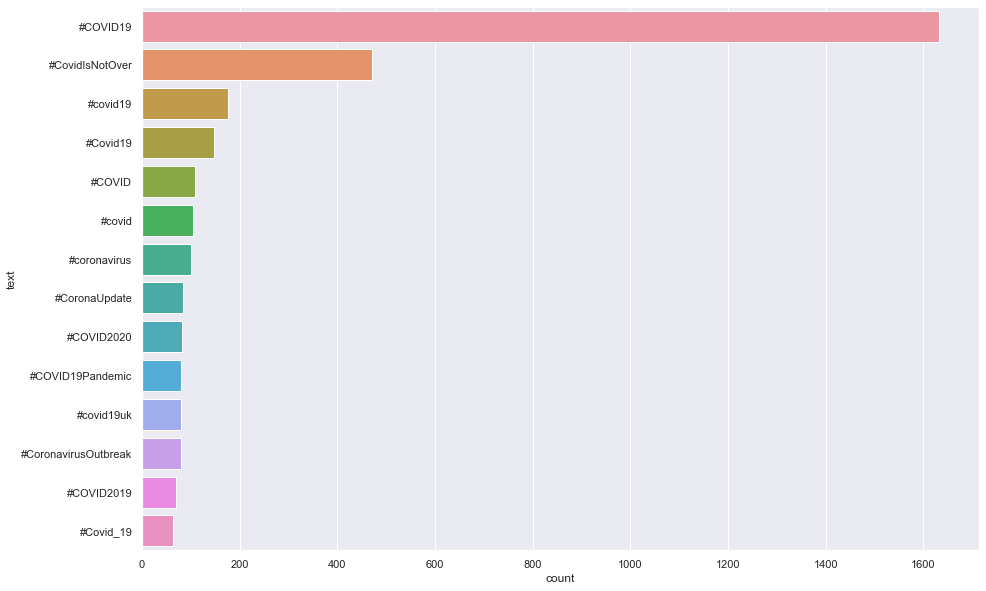

In [113]:
# Plot
ax = sns.barplot(x='count', y='text', data=tweet_text_df_over50)

In [114]:
# Identify all tweets with referecne to covid in text
#repeat for loop looking for text not #
tags = []
for y in [x.split(' ') for x in tweet_text.values]:
    for z in y:
        if 'Covid' in z:
            tags.append(z)
        elif 'covid' in z:
            tags.append(z)
        elif 'COVID' in z:
            tags.append(z)
        elif 'corona' in z:
            tags.append(z)
        elif 'Corona' in z:
            tags.append(z)
            
# Create series to count values in list
tags4 = pd.Series(tags).value_counts()
tags4.head(30)




#COVID19                                              1632
#CovidIsNotOver                                        472
Covid                                                  348
COVID-19                                               267
COVID                                                  198
#covid19                                               176
Covid-19                                               153
#Covid19                                               148
COVID19                                                143
covid                                                  140
#COVID                                                 108
#covid                                                 104
#coronavirus                                           100
Coronavirus                                             94
#CoronaUpdate                                           84
#COVID2020                                              82
#COVID19Pandemic                                        

In [121]:
#convert series into data frame
tweet_text_df2 = pd.DataFrame(tags4).reset_index()

#relable columns
tweet_text_df2.columns = ['text', 'count']

# remove # result
# identify partial string
discard = ['#']
filtered_df2= tweet_text_df2[~tweet_text_df2.text.str.contains('|'.join(discard))]

#output
filtered_df2.head()


,text,count
2,Covid,348
3,COVID-19,267
4,COVID,198
6,Covid-19,153
8,COVID19,143


In [125]:
# show examples of tweets
# Source: Norah's demon
#convert text of tweet from list of tweets
tweets_text_values = tweet_text.values

#crate DataFrame
dft = pd.DataFrame(tweets_text_values)
dft.columns = ['Tweets']
dft.head()

,Tweets
0,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...
1,#COVID19 is linked to more #diabetes diagnoses...
2,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...
3,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...
4,Advanced healthcare at your fingertips\nhttps:...


In [128]:
# filter by key words
subset = dft[dft['Tweets'].str.contains('cases', 'risk')]

# loop though DataFrame and print tweets containing key words
for i in subset.index:
    print('Tweets', i)
    print(subset.loc[i, 'Tweets'], '\n')
          

Tweets 38
More than 90% of those infected with COVID-19 show no symptoms
but the rest of the infected cases had either Type 2 diabetes, cardiovascular diseases, hypertension, and/or cancer, which means people with obesity  show severe symptoms.
#paraphrase
#COVID19
https://t.co/ZEtNx7f4jE 

Tweets 65
The CDC investigates mysterious cases of #PediatricHepatitis. Find out about this and more, including stories on diabetes' effect on #COVID19 outcomes and prioritization of future #cancer prevention for adolescent and young adult cancer survivors.
https://t.co/VlHgXy6Afg 

Tweets 77
Pregnant women have a low risk of having severe symptoms; however, in some cases -- especially those with obesity or gestational diabetes, or who are old, or who have underlying diseases -- they may have severe symptoms. 

#COVID19 https://t.co/4SG3GAMx04 

Tweets 190
Public Health Ontario's latest data on #COVID19 cases in ON, incl TO, is now available: https://t.co/oUxcc69p2S. 

TPH's case counts dashboard is

### 5.2) Presentation expectations:
Discuss whether external data could potentially be used and whether it is a viable solution to pursue. Discuss your assumptions and suggestions. 

Points to consider:
- What insights can be gained from the data?
- What are the advantages and disadvantages of using external data?
- How would you suggest using external data in the project?

## 6) Assignment activity 6: 

### 6.1) Report expectations:
- Demonstrate using external function and interpret results.
- Note observations.

In [ ]:
# You can copy and paste the relevant code cells from the provided template here.

### 6.2) Presentation expectations:
- **Question 1**: We have heard of both qualitative and quantitative data from the previous consultant. What are the differences between the two? Should we use only one or both of these types of data and why? How can these be used in business predictions? Could you provide examples of each?
- **Question 2**: We have also heard a bit about the need for continuous improvement. Why should this be implemented, it seems like a waste of time. Why can’t we just implement the current project as it stands and move on to other pressing matters?
- **Question 3**: As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Have we covered everything from a data ethics standpoint? Is there anything else we need to implement from a data ethics perspective? 